# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>

---

# **Import các thư viện**

In [46]:
# !pip install squarify

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import squarify 
from wordcloud import WordCloud, STOPWORDS

# **1. Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 ca khúc hay nhất trong 1 tuần của mỗi quốc gia từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

## **2. Khám phá dữ liệu và Tiền xử lý dữ liệu**

Đọc dữ liệu từ file csv

In [48]:
spotify_df = pd.read_csv("csv/final.csv", index_col= 0)

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_64884/2503757291.py:1: DtypeWarning:

Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.



## Một số thông tin cơ bản của Data Frame

Xem vài dòng dữ liệu

In [49]:
spotify_df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Plan A,...,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,ARRANCARMELO,...,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,Chance,...,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,Una Noche en Medellín,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,cuatro veinte,...,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish,0


Số chiều của Data Frame

In [50]:
spotify_df.shape

(1787999, 35)

Tên của các cột

In [51]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'collab', 'track_name',
       'release_date', 'album_num_tracks', 'album_cover', 'source',
       'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'week',
       'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'country', 'region', 'language', 'pivot'],
      dtype='object')

## Thông tin của một dòng

Một dòng dữ liệu mô tả: Thông tin cơ bản của bài hát đó trên spotify như là: id, tên bài hát, ca sĩ hát ca khúc đó, tuần xếp hạng, bao nhiêu lần xếp hàng, cường độ âm thanh của bài hát, đất nước đánh giá, ngôn ngữ của bài hát, …

## Thông tin của một cột

In [52]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', None)
columns_describe_df = pd.read_csv("csv/columns.csv")
columns_describe_df

,Tên cột,Mô tả
0,uri,URI của bản nhạc trên spotify
1,rank,Xếp hạng của bản nhạc trong tuần
2,artist names,Tên tất cả người thực hiện ca khúc
3,artists num,Số người thực hiện bài hát
4,artist individual,Bài hát của cá nhân nghệ sĩ
5,artist id,URI của nghệ sĩ độc quyền bài hát
6,artist genre,Thể loại mà nghệ sĩ trình diễn
7,artist img,Đường dẫn hình ảnh của nghệ sĩ
8,collab,0 nếu nghệ sĩ trình diễn một mình và 1 nếu ngư...
9,track name,tên của bản nhạc


## Kiểm tra xem các trường dữ liệu có vấn đề gì không

**Dữ liệu có bị trùng hay không?**

In [53]:
spotify_df.duplicated().sum()

72

Có 73 giá trị trùng 

In [54]:
spotify_df[spotify_df.duplicated()]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
51224,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
75474,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
81333,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
104818,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
133873,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684645,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1705705,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1736824,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1758970,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot


Như vậy có 73 giá trị trùng nhau (72 + 1 giá trị gốc), và bằng với số lượng dòng có giá trị giống tên cột. 

Ta sẽ loại bỏ các dòng này và loại bỏ luôn dòng gốc 

In [55]:
spotify_df.drop_duplicates(keep=False, inplace=True)
spotify_df.duplicated().sum()

0

Theo như tác giả, nếu một bài hát có nhiều ca sĩ thể hiện, bài hát sẽ được chia thành các hàng riêng cho từng nghệ sĩ. Tuy nhiên, ở đây ta bỏ qua thông tin của từng người thể hiện và chỉ xét đến thông tin của bài hát, do đó ta sẽ bỏ đi các cột trùng nhau này (chỉ khác nhau ở thông tin các nghệ sĩ thành viên). 

Thông tin của mỗi bài hát được phân biệt với nhau bằng <font color=red>uri, country, week</font>, vì vậy ta sẽ drop các hàng trùng nhau dựa trên cột này.

In [56]:
spotify_df[(spotify_df.country == "Vietnam") & (spotify_df.artists_num == 2)]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
1774373,spotify:track:46HNZY1i7O6jwTA7Slo2PI,5,"Coldplay, BTS",2.0,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a33...,1,My Universe,...,0.0114,0.0,0.328,0.47,105.006,226198,Vietnam,Asia,Vietnamese,0
1774374,spotify:track:46HNZY1i7O6jwTA7Slo2PI,5,"Coldplay, BTS",2.0,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop boy group,https://i.scdn.co/image/ab6761610000e5eb5704a6...,1,My Universe,...,0.0114,0.0,0.328,0.47,105.006,226198,Vietnam,Asia,Vietnamese,1
1774375,spotify:track:5PjdY0CKGZdEuoNab3yDmX,8,"The Kid LAROI, Justin Bieber",2.0,The Kid LAROI,spotify:artist:2tIP7SsRs7vjIcLrU85W8J,australian hip hop,https://i.scdn.co/image/ab6761610000e5eb152a7e...,1,STAY (with Justin Bieber),...,0.0383,0.0,0.103,0.478,169.928,141806,Vietnam,Asia,Vietnamese,0
1774376,spotify:track:5PjdY0CKGZdEuoNab3yDmX,8,"The Kid LAROI, Justin Bieber",2.0,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s,canadian pop,https://i.scdn.co/image/ab6761610000e5eb8ae7f2...,1,STAY (with Justin Bieber),...,0.0383,0.0,0.103,0.478,169.928,141806,Vietnam,Asia,Vietnamese,1
1774384,spotify:track:5T6j0rfpCDBzAxC8Fpd0N7,18,"Low G, Thắng",2.0,Low G,spotify:artist:6TITnFVRcl0AcZ4syE7Toe,vietnamese hip hop,https://i.scdn.co/image/ab6761610000e5eb00ece5...,1,An Thần,...,0.631,0.000002,0.114,0.907,169.996,174286,Vietnam,Asia,Vietnamese,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787991,spotify:track:51bYFYWODfYOZU0rwvjiCc,195,"Binz, Đen",2.0,Đen,spotify:artist:1LEtM3AleYg1xabW6CRkpi,v-pop,https://i.scdn.co/image/ab6761610000e5eb37206c...,1,Cho Mình Em,...,0.891,0.0212,0.115,0.371,99.886,206400,Vietnam,Asia,Vietnamese,1
1787992,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2.0,Kai Đinh,spotify:artist:3E6LGptA8lBEXPHAQCE3vr,v-pop,https://i.scdn.co/image/ab6761610000e5eb8c1162...,1,Thế Hệ Tan Vỡ (feat. SIVAN),...,0.671,0.000367,0.0938,0.335,140.112,288000,Vietnam,Asia,Vietnamese,0
1787993,spotify:track:0vLXpeE2Z7iVvcba8PAwwI,196,"Kai Đinh, SIVAN",2.0,SIVAN,spotify:artist:0wJWawRvX8K9joiK9QqkX5,0,https://i.scdn.co/image/ab6761610000e5eb0cd580...,1,Thế Hệ Tan Vỡ (feat. SIVAN),...,0.671,0.000367,0.0938,0.335,140.112,288000,Vietnam,Asia,Vietnamese,1
1787994,spotify:track:1XGmzt0PVuFgQYYnV2It7A,197,"Maroon 5, Wiz Khalifa",2.0,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,pop,https://i.scdn.co/image/ab6761610000e5eb288ac0...,1,Payphone,...,0.0188,0.0,0.287,0.545,110.015,231173,Vietnam,Asia,Vietnamese,0


In [57]:
spotify_df = spotify_df.drop_duplicates(subset=['uri','country','week'] , keep='first', ignore_index=True)

**Dữ liệu bị thiếu, rỗng**

In [58]:
spotify_df.isna().sum()

uri                    0
rank                   0
artist_names           0
artists_num            0
artist_individual      0
artist_id              0
artist_genre           0
artist_img           816
collab                 0
track_name             0
release_date           0
album_num_tracks       0
album_cover           15
source                 0
peak_rank              0
previous_rank          0
weeks_on_chart         0
streams                0
week                   0
danceability         145
energy               145
key                  145
mode                 145
loudness             145
speechiness          145
acousticness         145
instrumentalness     145
liveness             145
valence              145
tempo                145
duration             145
country                0
region                 0
language               0
pivot                  0
dtype: int64

Có một vài giá trị thiếu.<br>
Đối với `artist_img` và `album_cover` việc thiếu này ảnh hưởng không đáng kể, vì hai trường này là các cột hình ảnh.

Kiểm tra các cột cường độ

In [59]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

spotify_df[audio_cols].isnull().sum()

danceability        145
energy              145
key                 145
mode                145
loudness            145
speechiness         145
acousticness        145
instrumentalness    145
liveness            145
valence             145
tempo               145
duration            145
dtype: int64

Quả thật các cột cường độ, mỗi cột thiếu đi 145 dòng.

Ta kiểm tra qua từng cột xem dòng nào là dòng thiếu

In [60]:
spotify_df[spotify_df["danceability"].isna()][audio_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 6776 to 1075045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      0 non-null      object
 1   energy            0 non-null      object
 2   key               0 non-null      object
 3   mode              0 non-null      object
 4   loudness          0 non-null      object
 5   speechiness       0 non-null      object
 6   acousticness      0 non-null      object
 7   instrumentalness  0 non-null      object
 8   liveness          0 non-null      object
 9   valence           0 non-null      object
 10  tempo             0 non-null      object
 11  duration          0 non-null      object
dtypes: object(12)
memory usage: 14.7+ KB


May mắn khi truy xuất kiểm tra sự thiếu sót của cột `danceability`, phát hiện ra rằng các cột cường độ còn lại đều thiếu cùng hàng với cột đang xét.

**Xảy ra một số vấn đề về kiểu dữ liệu. Là do có nhiều kiểu dữ liệu bên trong cột.**

In [61]:
def open_oject_dtype(column):
    dtypes = set(column.apply(lambda x: type(x)))
    
    return dtypes

In [62]:
# spotify_df["rank"].unique()

# spotify_df["artists_num"].unique()

# spotify_df["collab"].unique()

# spotify_df["peak_rank"].unique()

# spotify_df["previous_rank"].unique()

# spotify_df["weeks_on_chart"].unique()

# spotify_df["streams"].unique()

# spotify_df[spotify_df["uri"] == "uri"]

In [63]:
columns = spotify_df.columns
# open_oject_dtype(spotify_df["uri"])
spotify_df[columns].apply(open_oject_dtype)

uri                                                  {<class 'str'>}
rank                                  {<class 'int'>, <class 'str'>}
artist_names                                         {<class 'str'>}
artists_num                         {<class 'str'>, <class 'float'>}
artist_individual                                    {<class 'str'>}
artist_id                                            {<class 'str'>}
artist_genre                                         {<class 'str'>}
artist_img                          {<class 'float'>, <class 'str'>}
collab                                {<class 'int'>, <class 'str'>}
track_name                                           {<class 'str'>}
release_date                                         {<class 'str'>}
album_num_tracks                    {<class 'str'>, <class 'float'>}
album_cover                         {<class 'float'>, <class 'str'>}
source                                               {<class 'str'>}
peak_rank                         

Cột `rank`, `artists_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` và một số cột `cường độ`: một phần số với kiểu dữ liệu **int**, một phần số với kiểu dữ liệu là **str**<br>

**Ta thấy các cột `rank`, `artist_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` lẽ ra phải có kiểu dữ liệu là numeric.** 
- Do đó ta sẽ tiến hành chuyển các cột này về đúng kiểu dữ liệu.<br>
- Ta sẽ viết hàm để thuận tiện cho việc chuyển.<br>
- Riêng cột `artists_num` có thêm hậu tố .0 phía sau nên sẽ xử lý riêng.

In [64]:
def to_numeric(column, data_type):
    spotify_df[column] = spotify_df[column].astype(data_type)
    #return spotify_df[column]
# print(spotify_df)

In [65]:
to_numeric('rank', int)

In [66]:
to_numeric('streams', int)

In [67]:
to_numeric('peak_rank', int)

In [68]:
to_numeric('previous_rank', int)

In [69]:
spotify_df['artists_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1109520 entries, 0 to 1109519
Series name: artists_num
Non-Null Count    Dtype 
--------------    ----- 
1109520 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


Cột `artists_num` có mixtypes

In [70]:
count = spotify_df['artists_num'].value_counts()
# count
count[count.index=='1.0'].sum()

515719

Text(0.5, 1.0, 'Số lượng ca sĩ thể hiện bài hát')

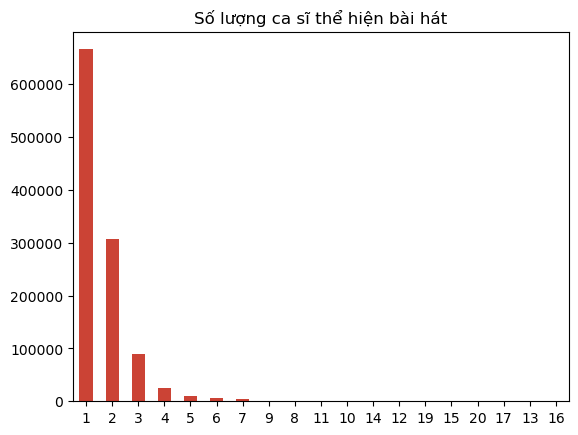

In [71]:
spotify_df['artists_num'] = spotify_df['artists_num'].apply(lambda x: str(x).replace('.0', '')).astype('Int64')
spotify_df['artists_num'].value_counts().plot.bar(rot = 0, color = '#CB4335')
plt.title('Số lượng ca sĩ thể hiện bài hát')

Text(0.5, 1.0, 'Số bài hát được collab')

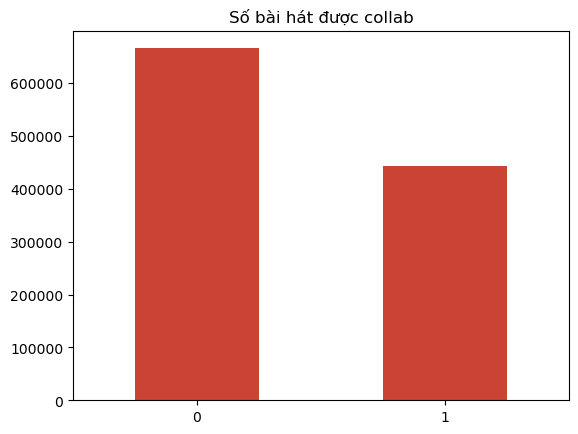

In [72]:
to_numeric('collab', int)
spotify_df['collab'].value_counts().plot.bar(rot = 0, color = '#CB4335')
plt.title('Số bài hát được collab')

**Số lượng giá trị 0 ở cột collab và giá trị 1 ở cột artists_num phải bằng nhau (số lượng nghệ sĩ biểu diễn là 1 người thì có nghĩa là không collab với ai)**

In [73]:
test = spotify_df[spotify_df['artists_num'] == 1].index == spotify_df[spotify_df['collab'] == 0].index
test.sum()

665596

Vậy ta có thể loại cột `collab` để giảm chiều dữ liệu? (vì từ cột `artists_num` có thể suy ra được cột `collab`)  

In [74]:
spotify_df.drop('collab', axis=1, inplace=True)

Ngoài ra, ta cũng cần chuyển kiểu dữ liệu của `release_date`, `week` về thành datetime

In [75]:
pattern = '%Y-%m-%d'
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], format=pattern)
spotify_df['week'] = pd.to_datetime(spotify_df['week'], format=pattern)

**Chuyển các cột `đặc trưng` (biên độ, âm lượng, tiết tấu..) của âm thanh thành kiểu dữ liệu numeric**

In [76]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

spotify_df[audio_cols].head()

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0
1,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0
2,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0
3,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0
4,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0


In [77]:
spotify_df[audio_cols] = spotify_df[audio_cols].astype(float)

**Xem qua một vài thống kê của dữ liệu**

In [78]:
spotify_df.describe()

,rank,artists_num,peak_rank,previous_rank,streams,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,1.109520e+06,1.109520e+06,1.109520e+06,1.109520e+06,1.109520e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06
mean,1.005018e+02,1.611443e+00,4.191652e+01,8.435407e+01,6.821519e+05,6.817758e-01,6.418535e-01,5.325786e+00,5.742693e-01,-6.350350e+00,1.059117e-01,2.697053e-01,1.148840e-02,1.682632e-01,5.346420e-01,1.219060e+02,2.050580e+05
std,5.773315e+01,1.010256e+00,4.659037e+01,5.949596e+01,2.377175e+06,1.381223e-01,1.638659e-01,3.629385e+00,4.944535e-01,2.461208e+00,9.691305e-02,2.528607e-01,7.584283e-02,1.249962e-01,2.263884e-01,2.981120e+01,5.015941e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,2.067000e+03,8.590000e-02,3.160000e-03,0.000000e+00,0.000000e+00,-4.141000e+01,2.230000e-02,1.770000e-06,0.000000e+00,1.340000e-02,1.000000e-05,3.126200e+01,3.013300e+04
25%,5.100000e+01,1.000000e+00,6.000000e+00,3.100000e+01,2.470400e+04,5.910000e-01,5.350000e-01,2.000000e+00,0.000000e+00,-7.671000e+00,4.100000e-02,5.470000e-02,0.000000e+00,9.270000e-02,3.640000e-01,9.698300e+01,1.726270e+05
50%,1.010000e+02,1.000000e+00,2.200000e+01,8.200000e+01,6.335900e+04,7.010000e-01,6.600000e-01,6.000000e+00,1.000000e+00,-6.008000e+00,6.290000e-02,1.860000e-01,0.000000e+00,1.180000e-01,5.370000e-01,1.199840e+02,1.997100e+05
75%,1.502500e+02,2.000000e+00,6.500000e+01,1.350000e+02,3.026252e+05,7.870000e-01,7.660000e-01,8.000000e+00,1.000000e+00,-4.598000e+00,1.330000e-01,4.180000e-01,5.220000e-05,2.030000e-01,7.100000e-01,1.410200e+02,2.295650e+05
max,2.000000e+02,2.000000e+01,2.000000e+02,2.000000e+02,8.495293e+07,9.860000e-01,1.000000e+00,1.100000e+01,1.000000e+00,1.906000e+00,9.660000e-01,9.950000e-01,9.900000e-01,9.900000e-01,9.920000e-01,2.320180e+02,1.787030e+06


**Các thể loại nhạc mà dataset đề cập**

In [79]:
list(spotify_df.artist_genre.unique())

['argentine hip hop',
 'argentine indie',
 'urbano chileno',
 'pop argentino',
 'pop',
 'cuarteto',
 'funk pop',
 'latin',
 'urbano espanol',
 '0',
 'trap argentino',
 'trap colombiano',
 'trap latino',
 'rap latina',
 'cumbia 420',
 'concurso de talentos argentino',
 'r&b en espanol',
 'latin pop',
 'cumbia',
 'argentine rock',
 'rock en espanol',
 'reggaeton',
 'cumbia pop',
 'dance pop',
 'folklore argentino',
 'gauze pop',
 'trap triste',
 'reggaeton colombiano',
 'puerto rican pop',
 'latin rock',
 'rock uruguayo',
 'latin alternative',
 'permanent wave',
 'canadian contemporary r&b',
 'boy band',
 'k-pop',
 'australian hip hop',
 'dutch pop',
 'rock nacional',
 'cumbia villera',
 'rkt',
 'glam rock',
 'lgbtq+ hip hop',
 'indie rock italiano',
 'colombian pop',
 'panamanian pop',
 'k-pop boy group',
 'modern alternative pop',
 'uk pop',
 'folclore salteno',
 'argentine telepop',
 'norwegian pop',
 'trap venezolano',
 'dominican pop',
 'album rock',
 'classic rock',
 'latin hip hop

**Ta thấy có rất nhiều thể loại nhạc (1626 thể loại)**
- Tại sao lại có thể loại nhạc là 0, nghĩa là không có thể loại nhạc (không có thông tin) hay lý do gì khác? Các giá trị này đến từ đâu?

In [80]:
spotify_df[spotify_df['artist_genre']=='0']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,...,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish,0
52,spotify:track:6bLvfGI2XeU5DTl8feuNrk,135,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Cómo estás,2019-04-17,...,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
108,spotify:track:1fKFxmSByZfjwVSbq0PHye,45,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,...,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish,0
154,spotify:track:6bLvfGI2XeU5DTl8feuNrk,161,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Cómo estás,2019-04-17,...,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
207,spotify:track:6bLvfGI2XeU5DTl8feuNrk,94,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db0...,Cómo estás,2019-04-17,...,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109476,spotify:track:3NPWH2UbMjch2vnS7qMFGM,100,"11:11 Music Group, Martin Arteta",2,11:11 Music Group,spotify:artist:2MDj296KJIfgWDNBtHzeFi,0,https://i.scdn.co/image/ab6761610000e5eb1e4934...,Past Lives,2021-05-27,...,0.9160,0.072500,0.0783,0.189,116.058,134583.0,Vietnam,Asia,Vietnamese,0
1109495,spotify:track:5xOkL4eAs735nm6mcnvfS6,139,"Flo D, Giang Nguyễn",2,Flo D,spotify:artist:25cLQ8alZJssXY06KE3SZP,0,https://i.scdn.co/image/ab6761610000e5ebc43411...,#AiChoAi,2016-04-24,...,0.9170,0.000343,0.1110,0.713,117.952,159974.0,Vietnam,Asia,Vietnamese,0
1109501,spotify:track:3wrzXRNJVxwOByPpYjyujB,151,"Studio Party, Quang Trung, Vũ Thảo My",3,Studio Party,spotify:artist:4JTjvap7y8AE0AMCH2f6kt,0,https://i.scdn.co/image/ab67616d0000b273bf30aa...,Và Ngày Nào Đó (feat. Vũ Thảo My),2022-03-16,...,0.7750,0.000000,0.3250,0.140,133.591,269733.0,Vietnam,Asia,Vietnamese,0
1109503,spotify:track:2MHGIiWus5xHykiZGuDtNe,158,"Sean, Lửa",2,Sean,spotify:artist:1xNqmjTeWon7iX8kbPKpZz,0,https://i.scdn.co/image/ab6761610000e5eb7b2d0d...,Em Thích,2021-12-03,...,0.6880,0.000000,0.1110,0.156,175.423,176151.0,Vietnam,Asia,Vietnamese,0


Theo như tác giả của Dataset, các giá trị 0 này là do: Trước khi gán genre vào, mặc định các giá trị này là 0. Sau khi thu thập dữ liệu, sẽ gán vào vị trí hợp lệ. Các giá trị nào không có thì số 0 mặc định này vẫn còn giữ nên có giá trị là 0.

In [81]:
len(spotify_df[spotify_df.artist_genre == "0"]["uri"].unique())

2079

In [82]:
import plotly.express as px

a = spotify_df[spotify_df['artist_genre']=='0']['country'].value_counts()
a = a.to_frame().rename(columns = {"country": "count"})
fig = px.treemap(a, path = [a.index], values = a["count"], color = a["count"])
fig.show()

Mô tả các cột dữ liệu

In [83]:
dtypes = pd.Series(data = spotify_df.dtypes)
numeric_cols = list(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
cate_cols = set(spotify_df. columns) - set(numeric_cols)
view = pd.DataFrame(cate_cols)
view

,0
0,source
1,language
2,pivot
3,rank
4,week
5,artist_individual
6,previous_rank
7,track_name
8,artist_img
9,album_num_tracks


In [84]:
numeric_profiles = {'missing_ratio': spotify_df[numeric_cols].isna().sum() * 100.0/len(spotify_df[numeric_cols]),
                        'min': spotify_df[numeric_cols].min(),
                        'max': spotify_df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
missing_ratio,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,0.013069,1.306871e-02
min,0.085900,0.003160,0.000000,0.000000,-41.410000,0.022300,0.000002,0.000000,0.013400,0.000010,31.262000,3.013300e+04
max,0.986000,1.000000,11.000000,1.000000,1.906000,0.966000,0.995000,0.990000,0.990000,0.992000,232.018000,1.787030e+06


In [85]:
cate_profiles = {'missing_ratio': spotify_df[cate_cols].isna().sum() * 100.0/len (spotify_df[cate_cols]),
                    'num_diff_vals': spotify_df[cate_cols].nunique (dropna=True),
                    'diff vals': spotify_df[cate_cols].stack(dropna=True).groupby(level= [1]). unique (),
}
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_64884/2452132965.py:1: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_64884/2452132965.py:1: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_64884/2452132965.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_64884/2452132965.py:3: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,album_cover,album_num_tracks,artist_genre,artist_id,artist_img,artist_individual,artist_names,artists_num,country,language,...,previous_rank,rank,region,release_date,source,streams,track_name,uri,week,weeks_on_chart
missing_ratio,0.001352,0.0,0.0,0.0,0.073545,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,27253,130,1626,9905,9718,9855,19382,19,74,40,...,201,200,10,3206,6621,466339,32672,39202,290,580
diff vals,[https://i.scdn.co/image/ab67616d0000b2737e117...,"[1.0, 2.0, 14.0, 15.0, 18.0, 16.0, 7.0, 17.0, ...","[argentine hip hop, argentine indie, urbano ch...","[spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z, spotif...",[https://i.scdn.co/image/ab6761610000e5ebf796a...,"[Paulo Londra, WOS, Cris Mj, Emilia, Harry Sty...","[Paulo Londra, WOS, Cris Mj, Emilia, Harry Sty...","[1, 3, 2, 7, 4, 5, 8, 6, 9, 19, 10, 11, 13, 17...","[Argentina, Australia, Austria, Belarus, Belgi...","[Spanish, English, German, Russian, Dutch, Por...",...,"[1, 129, 59, 5, 9, 6, 16, 15, 17, 21, 25, 49, ...","[1, 2, 3, 5, 6, 11, 17, 20, 23, 24, 25, 26, 27...","[South America, Oceania, Europe, North America...","[2022-03-23 00:00:00, 2022-04-06 00:00:00, 202...","[WEA Latina, DOGUITO Records / DALE PLAY Recor...","[3003411, 2512175, 2408983, 2080139, 1923270, ...","[Plan A, ARRANCARMELO, Chance, Una Noche en Me...","[spotify:track:2gpQi3hbcUAcEG8m2dlgfB, spotify...","[2022-04-14 00:00:00, 2022-04-28 00:00:00, 202...","[4, 2, 8, 3, 47, 6, 9, 70, 20, 11, 21, 25, 31,..."


In [86]:
# import os
# os.mkdir('./features')
# spotify_df.to_csv('./features/processed.csv',index=False, encoding='utf-8-sig')